In [24]:
#importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


LEVEL-1 


TASK-1: Data Exploration and Preprocessing


In [25]:
#loading the dataset 
df = pd.read_csv("Dataset.csv")
df.info()
df.head()                                             #printing the first five rows of the dataset
df.tail()                                             #printing the last five rows of the dataset
print(df.shape)                                       #no. of rows and columns 
print(df.dtypes)                                      #printing datatypes of all the columns 




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [26]:
print(df.isnull().sum())                              #check null values in each column
df.fillna({"Cuisines": "Unknown"}, inplace=True)      #handling missing values 
print(df.isnull().sum().sum())
df["Votes"] = df["Votes"].astype(int)     #datatype conversion

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
0


In [27]:
print(df["Aggregate rating"].describe())
print(df["Aggregate rating"].value_counts())

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


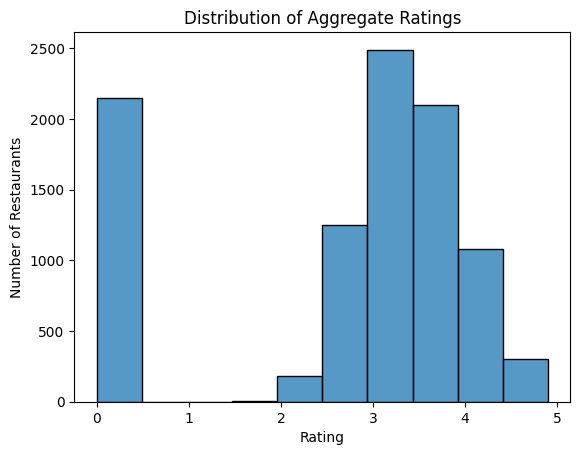

Aggregate rating
0.0    22.489792
3.2     5.465396
3.1     5.433986
3.4     5.214114
3.3     5.057062
3.5     5.025652
3.0     4.900010
3.6     4.795309
3.7     4.470736
3.8     4.188043
2.9     3.989111
3.9     3.507486
2.8     3.298084
4.1     2.868810
4.0     2.785049
2.7     2.617527
4.2     2.313894
2.6     1.999791
4.3     1.821799
4.4     1.507696
2.5     1.151712
4.5     0.994660
2.4     0.910899
4.6     0.816668
4.9     0.638677
2.3     0.492095
4.7     0.439745
2.2     0.282693
4.8     0.261753
2.1     0.157052
2.0     0.073291
1.9     0.020940
1.8     0.010470
Name: proportion, dtype: float64

In [28]:
#Visualization of the Rating Distribution
sns.histplot(df["Aggregate rating"], bins=10, kde=False)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.show()
#Checking for Class Imbalance
df["Aggregate rating"].value_counts(normalize=True) * 100    #Shows percentage distribution of each rating

TASK-2: Descriptive Analysis

In [29]:
#Calculating basic statistical measures
df[["Country Code", "City", "Cuisines"]].describe()     # Summary of Categorical Columns


,Country Code
count,9551.000000
mean,18.365616
std,56.750546
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,216.000000


In [30]:
#distribution of Country Codes
df["Country Code"].value_counts()    

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

In [31]:
# Distribution of Cities
df["City"].value_counts()

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

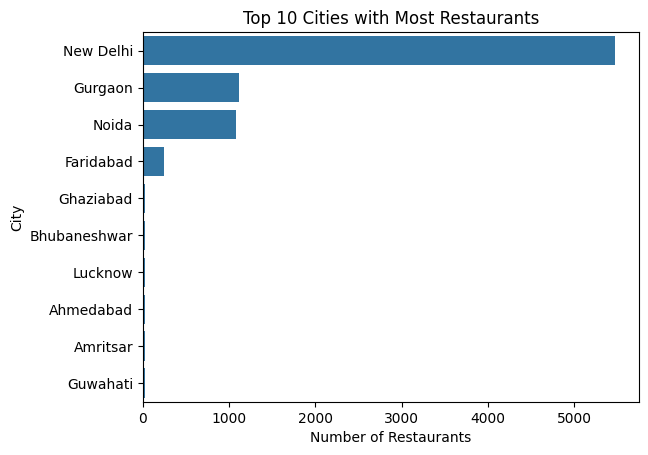

In [32]:
#visualization
top_cities = df["City"].value_counts().head(10)
sns.barplot(y=top_cities.index, x=top_cities.values)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

In [33]:
# Distribution of Cuisines
df["Cuisines"].value_counts()


Cuisines
North Indian                        936
North Indian, Chinese               511
Fast Food                           354
Chinese                             354
North Indian, Mughlai               334
                                   ... 
Kebab, Turkish Pizza, D�_ner          1
World Cuisine, Mexican, Italian       1
World Cuisine                         1
Kebab, Izgara                         1
Seafood, Asian, Filipino, Indian      1
Name: count, Length: 1826, dtype: int64

In [34]:
#Identifying Top Cuisines
top_cuisines = df["Cuisines"].value_counts().head(10)
print(top_cuisines)

Cuisines
North Indian                      936
North Indian, Chinese             511
Fast Food                         354
Chinese                           354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


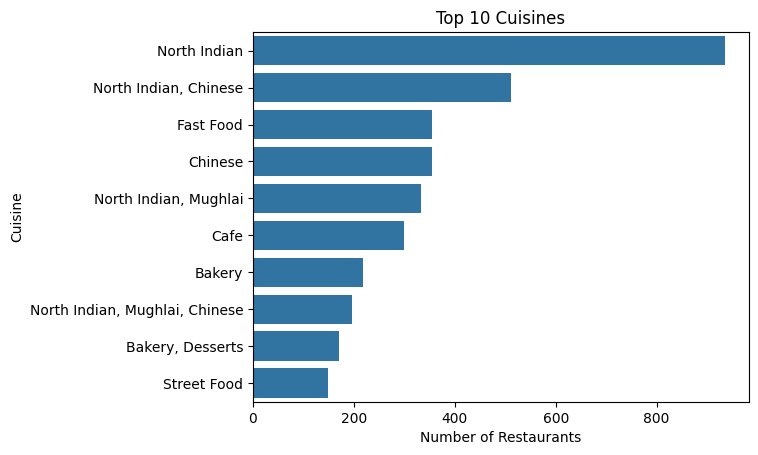

In [35]:
#visualization
sns.barplot(y=top_cuisines.index, x=top_cuisines.values)
plt.title("Top 10 Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()

TASK-3: Geospatial Analysis

In [36]:
#Checking for Missing Coordinates
print(df[["Latitude", "Longitude"]].isnull().sum())

Latitude     0
Longitude    0
dtype: int64


In [37]:
#This shows all restaurant locations on a world map. Each dot represents a restaurant

m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start=2)

for _, row in df.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]], popup=row["Restaurant Name"]).add_to(m)

m.save("restaurants_map.html")

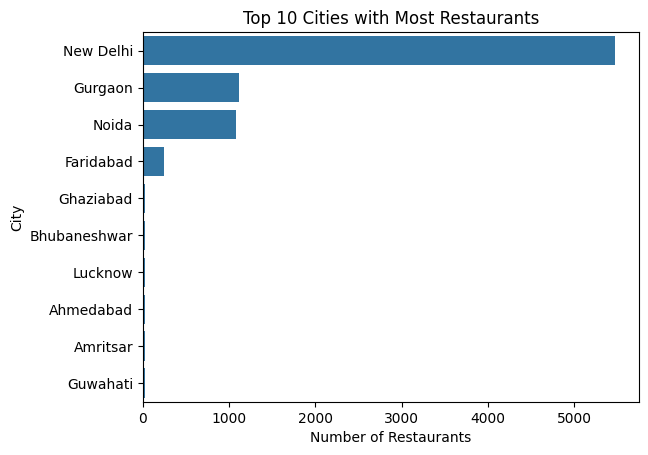

In [38]:
#Analyzing Restaurant Distribution by City  ||  To find out where restaurants are most concentrated.
city_counts = df["City"].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

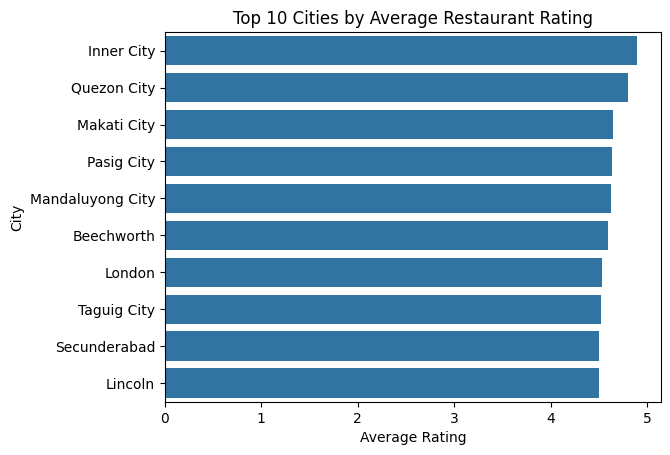

In [39]:
#Correlation Between Location and Rating
city_ratings = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=city_ratings.values, y=city_ratings.index)
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.xlabel("Average Rating")
plt.ylabel("City")
plt.show()